In [8]:
points_list = [(0,1), (1,5), (5,6), (5,4), (1,2), (2,3), (2,7)]


In [9]:
mapping={0:'Start', 1:'1', 2:'2', 3:'3', 4:'4', 5:'5', 6:'6', 7:'7-Destination'} 


In [12]:
!pip install networkx[default]


You should consider upgrading via the 'c:\users\tejshree reddy\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


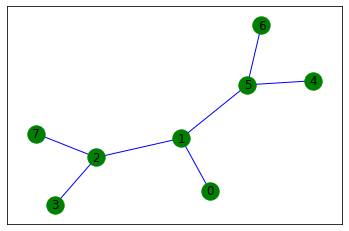

In [13]:
import numpy as np
import networkx as nx, pylab as plt
goal = 7
mapping={0:'Start', 1:'1', 2:'2', 3:'3', 4:'4', 5:'5', 6:'6', 7:'7-Destination'} 
G=nx.Graph()
G.add_edges_from(points_list)
pos = nx.spring_layout(G,k=.5,center=points_list[2])
nx.draw_networkx_nodes(G,pos,node_color='g')
nx.draw_networkx_edges(G,pos,edge_color='b')
nx.draw_networkx_labels(G,pos)
plt.show()

In [15]:
# Let's get our state and action matrix
R = np.matrix([[-1, 0, -1, -1, -1, -1, -1, -1],
               [0, -1, 0, -1, -1, 0, -1, -1],
               [-1, 0, -1, 0, -1, -1, -1, 100],
               [-1, -1, 0, -1, -1, -1, -1, -1],
               [-1, -1, -1, -1, -1, 0, -1, -1],
               [-1, 0, -1, -1, 0, -1, 0, -1],
               [-1, -1, -1, -1, -1, 0, -1, -1],
               [-1, -1, 0, -1, -1, -1, -1, 100]])
R.shape


(8, 8)

In [16]:
Q = np.matrix(np.zeros([8,8]))
gamma = 0.85
initial_state = 1


In [17]:
# returns available actions/destinations
def available_actions(state):
    current_state_row = R[state,]
    av_act = np.where(current_state_row >= 0)[1]
    return av_act

In [18]:
# randomly choses an action/destination
def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_act,1))
    return next_action


In [19]:
# updates Q matrix and Q learning based on path chosen
def update(current_state, action, gamma):
    max_index = np.where(Q[action,] == np.max(Q[action,]))[1]
    if max_index.shape[0] > 1:
        max_index = int(np.random.choice(max_index, size = 1))
    else:
        max_index = int(max_index)
    max_value = Q[action, max_index]
    Q[current_state, action] = R[current_state, action] + gamma*max_value

In [20]:
# train with 20000 iterations
for i in range(20000):
    current_state = np.random.randint(0,int(Q.shape[0]))
    available_act = available_actions(current_state)
    action = sample_next_action(available_act)
    update(current_state,action,gamma)

In [21]:
print("Results:")
print(Q)
print("Results nomalized:")
print(Q/np.max(Q)*100) # normalized

Results:
[[  0.         481.66666667   0.           0.           0.
    0.           0.           0.        ]
 [409.41666667   0.         566.66666667   0.           0.
  409.41666667   0.           0.        ]
 [  0.         481.66666667   0.         481.66666667   0.
    0.           0.         666.66666667]
 [  0.           0.         566.66666667   0.           0.
    0.           0.           0.        ]
 [  0.           0.           0.           0.           0.
  409.41666667   0.           0.        ]
 [  0.         481.66666667   0.           0.         348.00416667
    0.         348.00416667   0.        ]
 [  0.           0.           0.           0.           0.
  409.41666667   0.           0.        ]
 [  0.           0.         566.66666667   0.           0.
    0.           0.         666.66666667]]
Results nomalized:
[[  0.        72.25       0.         0.         0.         0.
    0.         0.      ]
 [ 61.4125     0.        85.         0.         0.        61.4125
  

In [22]:
def optimal_path(current_state):
    steps = [current_state]
    while current_state != 7:
        next_step_index = np.where(Q[current_state,] == np.max(Q[current_state,]))[1]
        if next_step_index.shape[0] > 1:
            next_step_index = int(np.random.choice(next_step_index, size=1))
        else:
            next_step_index = int(next_step_index)
        steps.append(next_step_index)
        current_state = next_step_index
    print("Optimal path: \n", steps)

In [23]:
optimal_path(0)


Optimal path: 
 [0, 1, 2, 7]


In [24]:
optimal_path(3)


Optimal path: 
 [3, 2, 7]
